In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load dataset
df = pd.read_csv("data.csv")  # Update path if needed

# Feature groups
categorical_cols = [
    "project_complexity", "scope_clarity", "urgency_level", "org_structure_type",
    "client_priority", "team_sdlc_knowledge", "user_involvement", "tool_familiarity",
    "tech_stack_familiarity", "testing_strategy", "on_schedule", "communication_quality",
    "risk_management_score", "control_mechanism"
]


min_val = df["success_status"].min() 
max_val = df["success_status"].max()  

df["success_status"] = (df["success_status"] - min_val) / (max_val - min_val)

boolean_col = ["legacy_system_involved"]
numerical_cols = ["avg_dev_experience", "pm_experience", "budget_estimation"]
target_col = "success_status"

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False), categorical_cols),
        ("bool", OneHotEncoder(sparse_output=False, drop="if_binary"), boolean_col),
        ("num", MinMaxScaler(), numerical_cols)
    ],
    remainder="passthrough"
)

# Apply transformation
processed_data = preprocessor.fit_transform(df)

# Column names
encoded_columns = (
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols).tolist()
    + preprocessor.named_transformers_["bool"].get_feature_names_out(boolean_col).tolist()
    + numerical_cols
    + [target_col]
)

# Create final DataFrame
processed_df = pd.DataFrame(processed_data, columns=encoded_columns)

# Show the result
print(processed_df.head())



   project_complexity_high  project_complexity_low  project_complexity_medium  \
0                      0.0                     1.0                        0.0   
1                      0.0                     1.0                        0.0   
2                      1.0                     0.0                        0.0   
3                      1.0                     0.0                        0.0   
4                      0.0                     0.0                        1.0   

   scope_clarity_clear  scope_clarity_medium  scope_clarity_vague  \
0                  1.0                   0.0                  0.0   
1                  1.0                   0.0                  0.0   
2                  1.0                   0.0                  0.0   
3                  0.0                   0.0                  1.0   
4                  0.0                   0.0                  1.0   

   urgency_level_high  urgency_level_low  urgency_level_medium  \
0                 1.0           

In [3]:
df = processed_df

In [4]:
df

,project_complexity_high,project_complexity_low,project_complexity_medium,scope_clarity_clear,scope_clarity_medium,scope_clarity_vague,urgency_level_high,urgency_level_low,urgency_level_medium,org_structure_type_functional,...,risk_management_score_low,risk_management_score_medium,control_mechanism_moderate,control_mechanism_strong,control_mechanism_weak,legacy_system_involved_True,avg_dev_experience,pm_experience,budget_estimation,success_status
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.242857,0.137566,0.026092,0.482759
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.650000,0.544974,0.337861,0.931034
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.850000,0.603175,0.829088,0.448276
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.228571,0.285714,0.159512,0.517241
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.607143,0.169312,0.683684,0.655172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.192857,0.814815,0.648662,0.448276
496,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.471429,0.015873,0.859609,0.517241
497,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.007143,0.629630,0.033342,0.344828
498,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.228571,0.058201,0.892830,0.379310


In [5]:
# Separate features and target
X = df.drop("success_status", axis=1).values
y = df["success_status"].values

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu')) # First hidden layer
model.add(Dropout(0.2))  
model.add(Dense(32, activation='relu'))                         # Second hidden layer
model.add(Dense(1, activation='sigmoid'))                       # Output layer (probability)

c:\Users\saza\.conda\envs\langchain\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0353 - mae: 0.1517 - val_loss: 0.0333 - val_mae: 0.1459
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0317 - mae: 0.1425 - val_loss: 0.0271 - val_mae: 0.1317
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - mae: 0.1223 - val_loss: 0.0214 - val_mae: 0.1165
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - mae: 0.1087 - val_loss: 0.0170 - val_mae: 0.1032
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0147 - mae: 0.0955 - val_loss: 0.0135 - val_mae: 0.0907
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0141 - mae: 0.0930 - val_loss: 0.0112 - val_mae: 0.0826
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0112 - mae: 0.0850 - val_loss: 0.0095 - val_mae: 0.0769
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099 - mae: 0.0811 - val_loss: 0.0084 - val_mae: 0.0718
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [12]:
# Evaluate model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MAE: {mae:.4f}")


Test MAE: 0.0368


In [29]:
# Example new project input (ensure the same preprocessing steps!)
new_project = np.array([X_test[12]])  # Using a sample from test set for demo
predicted_success = model.predict(new_project)
print(f"Predicted Success Probability: {predicted_success[0][0]:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Success Probability: 0.806


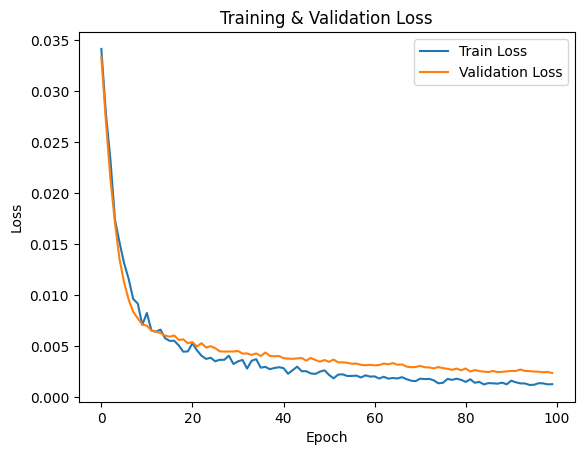

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

In [15]:
model.save("project_success_ann.h5")

In [16]:
import joblib
joblib.dump(preprocessor.named_transformers_['cat'], 'onehot_encoder.pkl')

['onehot_encoder.pkl']

In [17]:
joblib.dump(preprocessor.named_transformers_['num'], 'minmax_scaler.pkl')


['minmax_scaler.pkl']

In [30]:

print(max_val)

0.66
